In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import skimage.exposure
import numpy as np

In [2]:
ORI_SIZE = (271, 481)
def sliding_crop(inputFile, stepSize=64, windowSize=(256, 256)):
    splited_images = []
    img = tf.io.read_file(inputFile)
    img = tf.io.decode_png(img, channels=3)
    y_end_crop, x_end_crop = False, False
    for y in range(0, ORI_SIZE[0], stepSize):
        y_end_crop = False
        for x in range(0, ORI_SIZE[1], stepSize):
            x_end_crop = False
           
            if (y + windowSize[0]) > ORI_SIZE[0]:
                y = ORI_SIZE[0] - windowSize[0]
                y_end_crop = True
            
        
            if (x + windowSize[1]) > ORI_SIZE[1]:
                x = ORI_SIZE[1] - windowSize[1]
                x_end_crop = True
                
                
            if x_end_crop:
                break
            print(y, x)
            splited_images.append(tf.image.crop_to_bounding_box(img, y, x, windowSize[0], windowSize[1]))    
            
        if x_end_crop and y_end_crop:
            break
                
    
    return splited_images

def calculate_std_select_image(images):
    current_std = 0
    current_image = []
    list_std = []
    for ix in images:
        std_image = tf.math.reduce_std(tf.cast(ix, dtype=tf.float32))
        print(current_std)
        if std_image > current_std or current_std == 0:
            current_std = std_image
            current_image = ix
        list_std.append(std_image)
    print(current_std)
    print(current_image)
    return current_image

In [3]:
def crop_left_and_right(inputFile, IMG_W=256, IMG_H=256):
    img = cv2.imread(inputFile)
    h = img.shape[0]
    w = img.shape[1]
    
    img_left = img[0:0+IMG_H, 0:0+IMG_W]
    img_right = img[h-IMG_H:h, w-IMG_W:w]
    
    return img_left, img_right

In [4]:
def crop_left_and_right_tf(inputFile):
    ORI_SIZE = (271, 481)
    IMG_H = 271
    IMG_W = 256
    img = tf.io.read_file(inputFile)
    img = tf.io.decode_bmp(img, channels=3)
    # print(tf.rank(img))
    img = tf.cast(img, tf.float32)

    img_left = tf.image.crop_to_bounding_box(img, 0, 0, IMG_H, IMG_W)
    img_right = tf.image.crop_to_bounding_box(img, ORI_SIZE[0] - IMG_H, ORI_SIZE[1] - IMG_W, IMG_H, IMG_W)
    return img_left, img_right
    

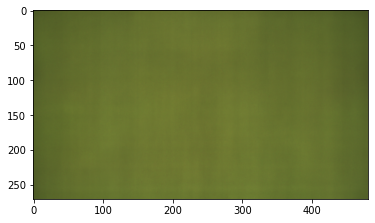

In [5]:
inputFile = "mura_data/RGB/mura_clean/test_data/defect/defect.png"

defect_img = cv2.imread(inputFile)

plt.imshow(defect_img)

In [6]:
# defect_img, grad_colored = contrast_depth_estimation(inputFile)
# defect_img = homo_filter(inputFile)
# defect_img_left, defect_img_right = crop_left_and_right_tf(inputFile)
images = sliding_crop(inputFile)
# defect_img = read_depth(inputFile)
print(len(images))
# std_images = calculate_std_select_image(images)

# # plt.imshow(defect_img_left.numpy().astype(np.uint8))
# fig, axes = plt.subplots(5,8, figsize=(32,32))

# for i,ax in enumerate(axes.flat):
#     ax.imshow(images[i])

0 0
0 64
0 128
0 192
15 0
15 64
15 128
15 192
8


2022-04-21 22:05:58.416254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# plt.imshow(defect_img_right.numpy().astype(np.uint8))

In [8]:
inputFile = "mura_data/RGB/mura_clean/test_data/normal/normal.png"

normal_img = cv2.imread(inputFile)
# plt.imshow(normal_img)

0 0
0 64
0 128
0 192
15 0
15 64
15 128
15 192
8


IndexError: list index out of range

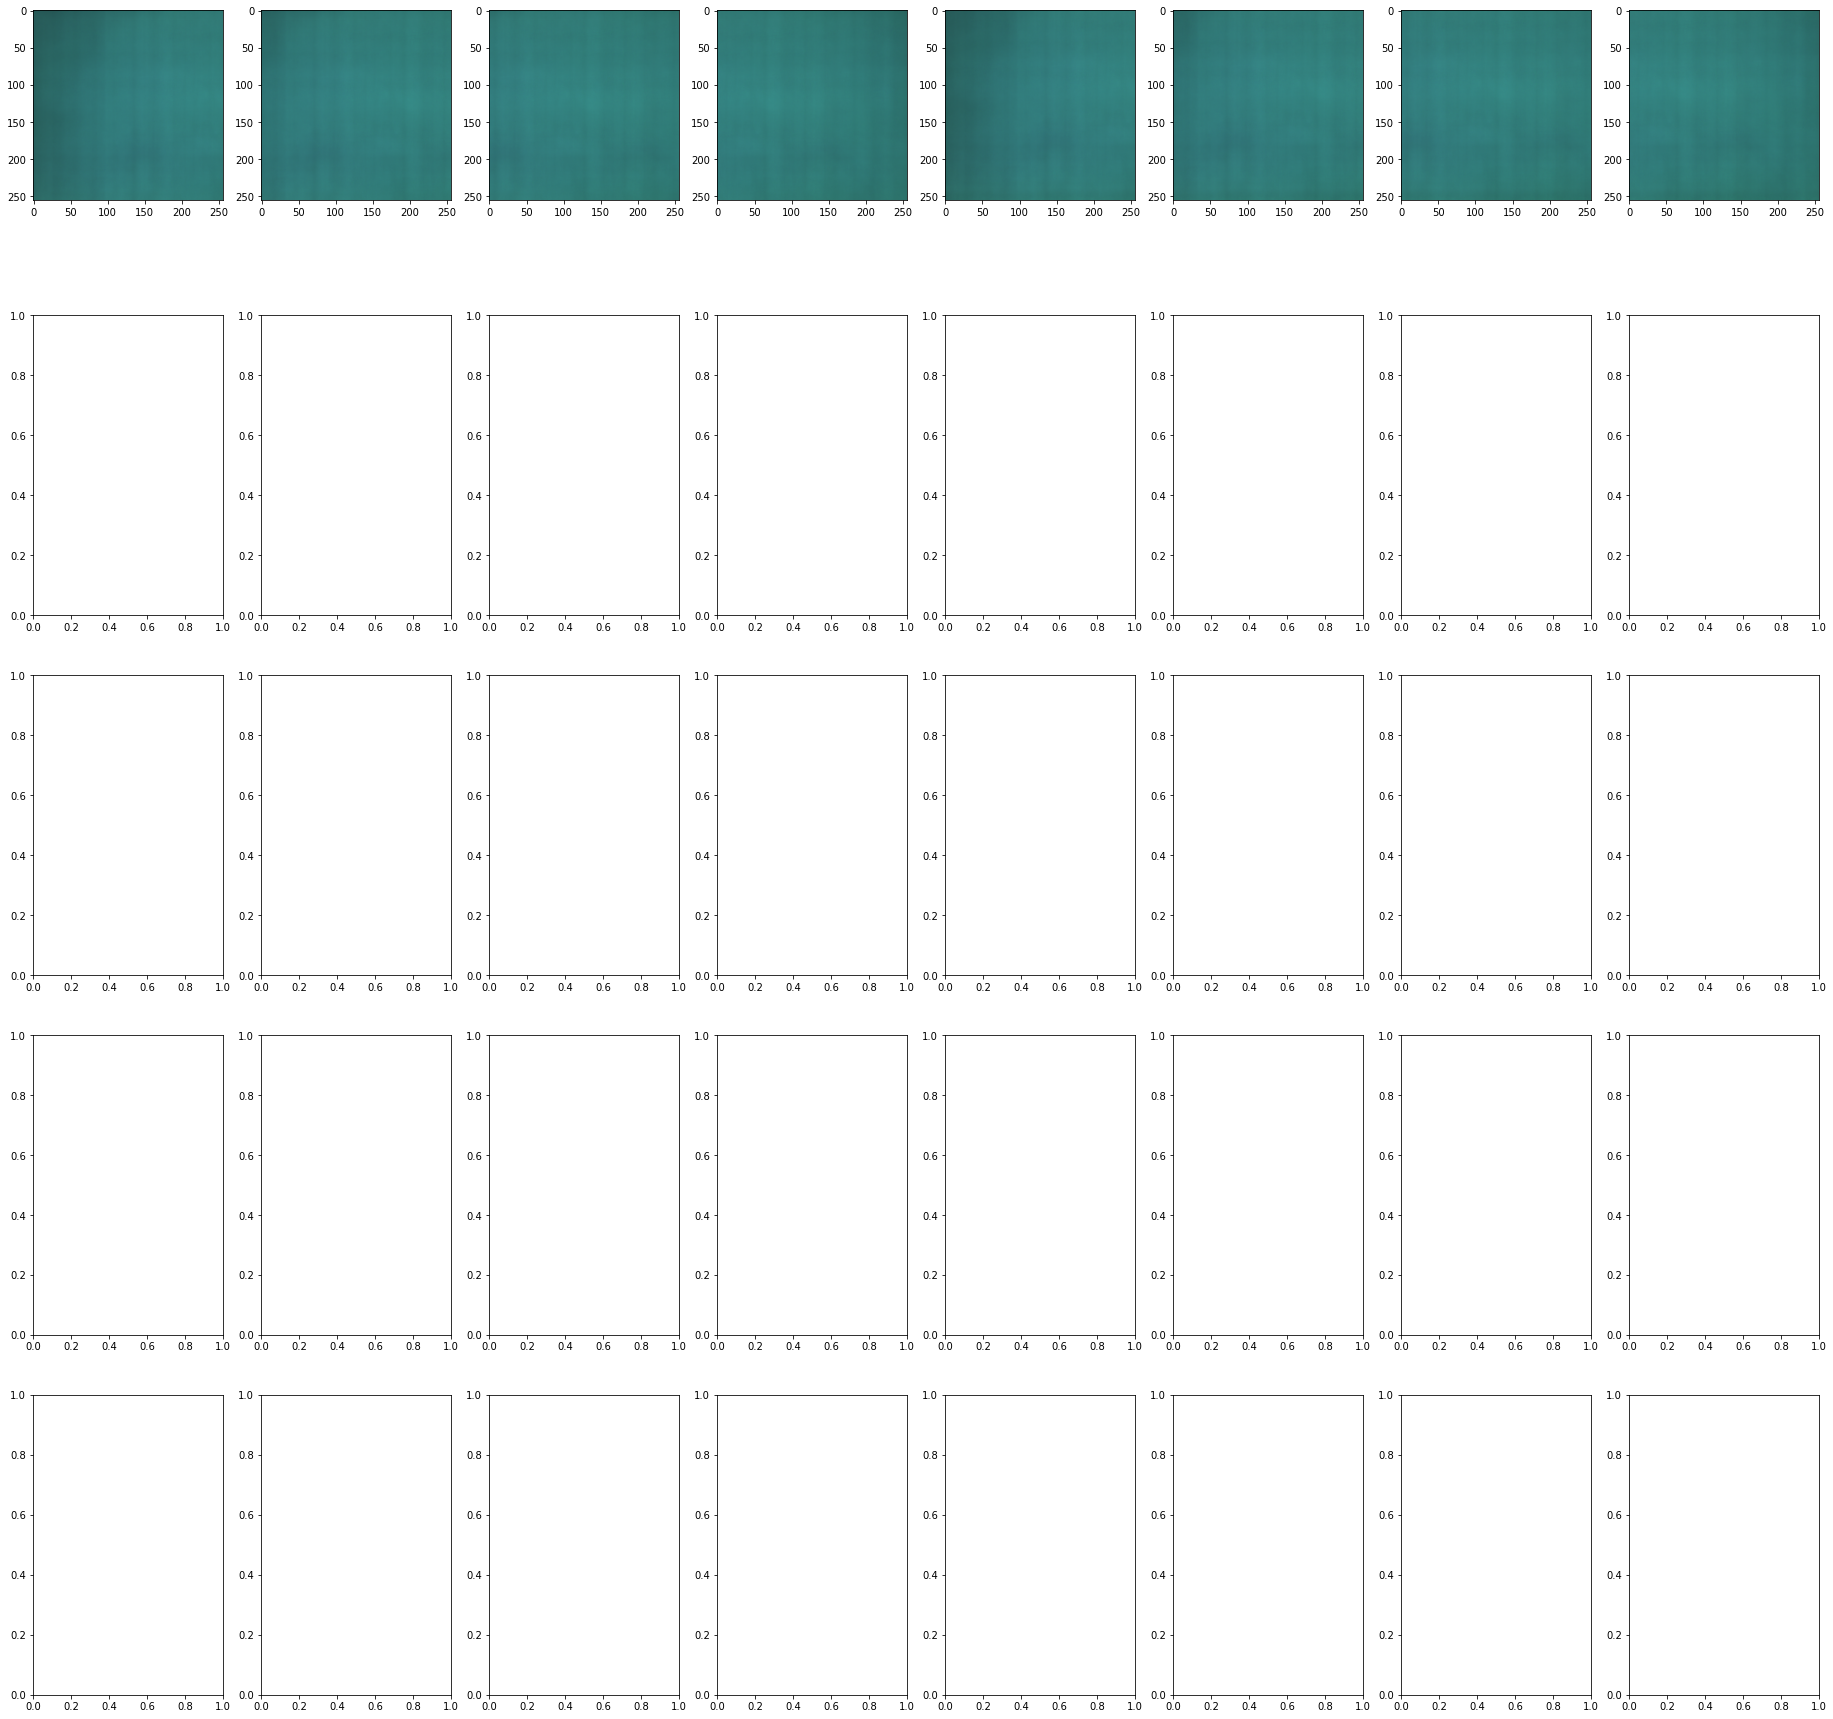

In [9]:
images = sliding_crop(inputFile)
# defect_img = read_depth(inputFile)
print(len(images))
# plt.imshow(defect_img_left.numpy().astype(np.uint8))
fig, axes = plt.subplots(5,8, figsize=(32,32))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i])